In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
# Load your dataset
df = pd.read_csv("USA Housing Dataset.csv")  # Replace with your actual dataset
df

# # Select features (X) and target (y)
# X = df[['feature1', 'feature2', 'feature3']]  # Select relevant features
# y = df['target']  # Target variable


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [68]:
df = df.drop(["date",],axis=1)
df = df.drop(["street",],axis=1)
df = df.drop(["statezip",],axis=1)
df = df.drop(["country",],axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['city'],drop_first ='True')

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,True,False,False,False,False,False,False,False,False
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,False
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,...,False,False,False,False,False,False,False,False,False,False
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,...,False,True,False,False,False,False,False,False,False,False
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,False,True,False,False,False,False,False,False,False,False
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,False,False,False,False,False,False,False,False,False,False
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,False,False,False,False,False,False,False,False,False,False
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,False,True,False,False,False,False,False,False,False,False


In [69]:
X = df.drop('price', axis=1).values 
y = df['price'].values  

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=366)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize features
X_test = scaler.fit_transform(X_test)  # Standardize features




In [72]:

#find numbe of columns and initialise w(weight),b (bias) which are the parameters on which gradient descent depends

columns = X_train.shape[1]
w = np.zeros(columns)  # Initialize weights to zero
b = 0  # Initialize bias to zero

In [73]:

#defining gradient descent here. Using it to find optimum solution to minimize cost function. Iterations are saved in cost_history

def gradient_descent(X, y, w, b, a, iters):
    m = len(y) 
    cost_history = []

    for i in range(iters):
        y_pred = X.dot(w) + b
        errors = y_pred - y
        dw = (1 / m) * X.T.dot(errors)  
        db = (1 / m) * errors.sum()     
        w -= a * dw
        b -= a * db
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost}")

    return w, b, cost_history


In [74]:
# a represents alpha(learning rate)
a = 0.01
iters = 500

w, b, cost_history = gradient_descent(X_train, y_train, w, b, a, iters)


Iteration 0: Cost=353048872878.2604
Iteration 100: Cost=177719664630.73547
Iteration 200: Cost=157897975974.8155
Iteration 300: Cost=155060488641.1006
Iteration 400: Cost=154588957040.55048


In [75]:
# Predict on test set
y_pred = X_test.dot(w) + b  # Compute predictions






In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"R² Score: {r2}")

R² Score: 0.6559458199991131


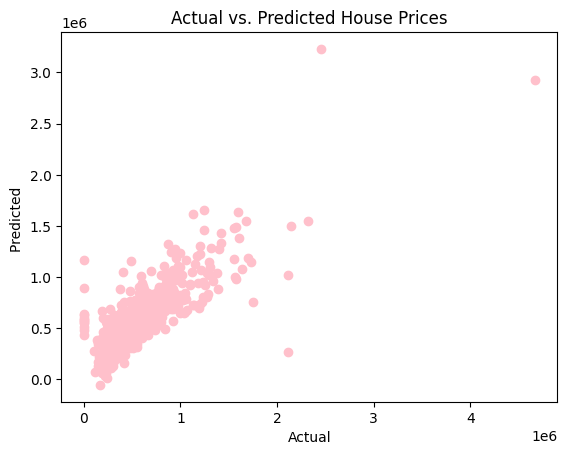

In [77]:


plt.scatter(y_test, y_pred, color='pink')

plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Actual vs. Predicted House Prices")
plt.show()


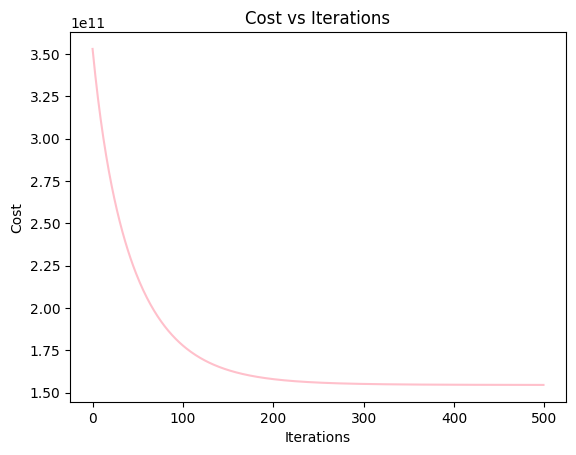

In [78]:
plt.plot(cost_history, color='pink')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()